# Exploratory Data Analysis 
Exploratory data analysis is performed on Mock dataset for surgical operation which is similar to the real dataset.
This contains surgery related features where exploratory data analysis on the dataset is done to get more information and to see the distributions of the feature variables and how they are correlated with the target `'blood loss'`.
 
Detail description about few features that are being used are

ICD is the foundation for the identification of health trends and statistics globally, and the international standard for reporting diseases and health conditions.
These are diagnostic codes that create a uniform vocabulary for describing the causes of injury, illness and death. ICD codes are used to represent a doctor’s diagnosis and the patient’s condition. 

OPCS Classification of Interventions and Procedures version 4,[1] is the procedural classification used by clinical coders. OPCS codifies operations, procedures and interventions performed during in-patient stays, day case surgery and some out-patient treatments in NHS hospitals. 

The ASA physical status classification system is a system for assessing the fitness of patients before surgery.

Preoperative antibiotic prophylaxis is defined as the administration of antibiotics prior to performing surgery to help decrease the risk of postoperative infections. The routine administration of prophylactic antibiotics is standard in cases in which a patient will have an artificial implant or foreign body implanted as part of the procedure, in bone grafting procedures, and other surgeries in which large dissections and higher amounts of anticipated blood loss is expected. Antibiotics should be given within 30 to 60 minutes of a surgical incision.
 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

Loaded the sample_data_v2.csv mock dataset

In [2]:
data = pd.read_csv("sample_data_v2.csv")

In [3]:
data.head()

,age,gender,weight (kg),allergy,year,ASA,ICD10,OPCS,antibiotic_time,operation_start_time,previous_surgery,surgery_time,operation_time,blood loss (ml)
0,54-63,F,87.0,NaN,2005,NaN,D14,C02,NaN,23:16:39,True,NaN,01:27:28,154
1,64-72,M,NaN,NaN,2006,NaN,G45,C38,NaN,23:35:50,False,00:30:29,01:02:08,198
2,73-95,F,64.0,NaN,2014,NaN,G17,A26,NaN,15:54:01,True,NaN,00:45:20,542
3,73-95,M,110.0,NaN,2009,3.0,B53,H35,NaN,06:44:32,False,00:32:14,00:56:28,199
4,18-41,F,NaN,NaN,2009,NaN,G84,L33,NaN,01:31:31,False,00:18:46,01:14:38,156


In [4]:
data.shape

(10000, 14)

It could be seen that there are 10000 entries and there are missing values in weight (kg) ,allergy, ASA, antibiotic_time, surgery_time

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
age                     10000 non-null object
gender                  10000 non-null object
weight (kg)             8112 non-null float64
allergy                 158 non-null object
year                    10000 non-null int64
ASA                     6707 non-null float64
ICD10                   10000 non-null object
OPCS                    10000 non-null object
antibiotic_time         2012 non-null object
operation_start_time    10000 non-null object
previous_surgery        10000 non-null bool
surgery_time            8002 non-null object
operation_time          10000 non-null object
blood loss (ml)         10000 non-null int64
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [6]:
data.isnull().sum()

age                        0
gender                     0
weight (kg)             1888
allergy                 9842
year                       0
ASA                     3293
ICD10                      0
OPCS                       0
antibiotic_time         7988
operation_start_time       0
previous_surgery           0
surgery_time            1998
operation_time             0
blood loss (ml)            0
dtype: int64

In the Statistics for numerical values, it could be see that for the column `['weight (kg)']` there are some outliers as the minimum and maximum values are two extreme values and there are not within reasonable range.

In [7]:
data.describe()

,weight (kg),year,ASA,blood loss (ml)
count,8112.000000,10000.000000,6707.000000,10000.000000
mean,81.857249,2011.527800,3.796779,275.587500
std,84.721859,4.335678,1.248561,242.598927
min,-1.000000,2004.000000,1.000000,-25.000000
25%,55.000000,2008.000000,3.000000,130.000000
50%,76.000000,2012.000000,4.000000,196.000000
75%,98.000000,2015.000000,5.000000,337.250000
max,1300.000000,2019.000000,6.000000,2983.000000


In [8]:
data.nunique()

age                        7
gender                     2
weight (kg)              155
allergy                  101
year                      16
ASA                        6
ICD10                    701
OPCS                    1199
antibiotic_time         1977
operation_start_time    9418
previous_surgery           2
surgery_time            3814
operation_time          4608
blood loss (ml)         1071
dtype: int64

There are no duplicate entries in the dataset and all of them are unique

In [9]:
data.duplicated().sum()

0

In [10]:

cat_col = ['gender', 'previous_surgery']

for col in cat_col:
    print("{}:{}".format(col, data[col].unique()))

gender:['F' 'M']
previous_surgery:[ True False]


There is equal distribution of both male and female entries in the dataset

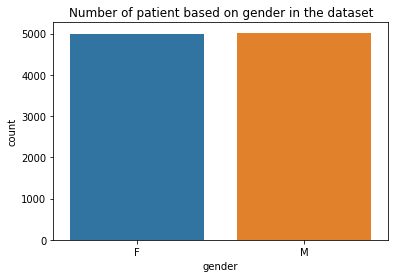

In [11]:
sns.countplot(x='gender', data=data)
plt.title("Number of patient based on gender in the dataset")
plt.show()

Mean blood loss for the complete dataset is 275ml. For male patients it is 281 and for female patients it is 269.
From the results it could be seen from the dataset that there is more blood loss for Male entries compared to female entries which is a useful feature during the prediction of the blood loss.

In [12]:
data[data['gender'] =='F'].describe()

,weight (kg),year,ASA,blood loss (ml)
count,4051.000000,4979.000000,3309.000000,4979.000000
mean,74.898790,2011.544286,3.812934,269.427998
std,91.037931,4.376399,1.251747,251.096192
min,-1.000000,2004.000000,1.000000,-25.000000
25%,47.000000,2008.000000,3.000000,121.000000
50%,69.000000,2012.000000,4.000000,186.000000
75%,89.000000,2015.000000,5.000000,328.000000
max,1300.000000,2019.000000,6.000000,2983.000000


In [13]:
data[data['gender'] =='M'].describe()

,weight (kg),year,ASA,blood loss (ml)
count,4061.000000,5021.000000,3398.000000,5021.000000
mean,88.798572,2011.511452,3.781048,281.695479
std,77.302507,4.295290,1.245433,233.732880
min,-1.000000,2004.000000,1.000000,-22.000000
25%,63.000000,2008.000000,3.000000,137.000000
50%,85.000000,2012.000000,4.000000,203.000000
75%,106.000000,2015.000000,5.000000,344.000000
max,1300.000000,2019.000000,6.000000,2329.000000


In [14]:
mean_M = data[data['gender'] =='M']['blood loss (ml)'].mean()
print("Mean blood loss for Male entries :{}".format(mean_M))
mean_F = data[data['gender'] =='F']['blood loss (ml)'].mean()
print("Mean blood loss for Female entries :{}".format(mean_F))
mean_ALL = data['blood loss (ml)'].mean()
print("Mean blood loss for all the entries :{}".format(mean_ALL))

Mean blood loss for Male entries :281.69547898824936
Mean blood loss for Female entries :269.42799758987746
Mean blood loss for all the entries :275.5875


['54-63' '64-72' '73-95' '18-41' '42-53' '-1' '250']


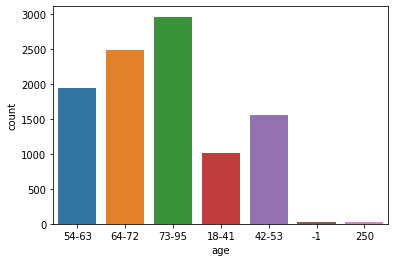

In [15]:
print(data['age'].unique())
sns.countplot(x='age', data=data)


In [16]:
data['blood loss (ml)'].describe()

count    10000.000000
mean       275.587500
std        242.598927
min        -25.000000
25%        130.000000
50%        196.000000
75%        337.250000
max       2983.000000
Name: blood loss (ml), dtype: float64

In [17]:
data.groupby('age')['blood loss (ml)'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
-1,23.0,176.130435,152.899939,25.0,100.00,114.0,195.50,624.0
18-41,1013.0,253.482725,220.101025,7.0,117.00,174.0,322.00,2015.0
250,20.0,316.050000,223.161607,63.0,150.75,233.0,439.00,744.0
42-53,1558.0,266.842105,249.118277,-25.0,116.00,173.0,328.00,2017.0
54-63,1942.0,283.848610,273.324662,-22.0,129.25,195.5,343.75,2983.0
64-72,2484.0,284.508454,244.006033,-15.0,133.00,206.0,348.25,2002.0
73-95,2960.0,275.348649,223.133900,-22.0,141.00,204.5,333.25,2685.0


After aggregrating the data with age which create a new dataframe of ages and calculated the mean blood loss for these age groups.From the below results it could be seen that there is more blood loss for the age groups of `42-53` and `54-63` but it is almost equal to the mean of the total dataset whic his 275ml.
Also there is an invalid age group of 250 years.

In [18]:
data.dropna().groupby(['age'])['blood loss (ml)'].mean()

age
18-41    125.00
250      169.00
42-53    585.20
54-63    380.00
64-72    242.25
73-95    264.00
Name: blood loss (ml), dtype: float64

From the below result is could be seen that allergy is an important feature during prediction of blood loss. For `ALLERGY TO ARTEMISIA VULGARIS` there is a blood loss of 1674 ml followed by `CYPROTERONE ACETATE AND ETHINYLESTRADIOL` with 592ml

In [19]:
data.dropna().groupby(['allergy'])['blood loss (ml)'].mean()

allergy
ALLERGY TO ARTEMISIA VULGARIS                                        1674.000000
ALLERGY TO FOOD ADDITIVE                                              125.000000
CYPROTERONE ACETATE AND ETHINYLESTRADIOL                              592.000000
FLUOCORTOLONE                                                         338.000000
INTERFERON-A-2A                                                       104.000000
NON-IMMUNOGLOBULIN E-MEDIATED DRUG SENSITIVITY,  CYCLOPENTHIAZIDE     253.000000
PENICILLIN                                                            208.666667
PLEASE SEE PAGE 05 OF THE PREASSESMENT BOOKLET                        168.000000
PSEUDO TO ASPARTAME                                                   310.000000
TRIPHENYLMETHANE AZO DISINFECTANT DYE                                 481.000000
VERAPAMIL                                                             373.000000
XYLOMETAZOLINE                                                        169.000000
Name: blood loss (ml

After aggregrating based on `[ASA], [ICD10], [OPCS]` the mean value of blood loss provides few outputs which could be useful during the predction of blood loss.
From the result based on the phycical status which is defined by `ASA` comparted to 1 and 2 which could be consired as healthy there is less blood less than others. Same with `[ICD10], [OPCS]` where for few codes there is more blood loss than others.

In [20]:
print("Blood loss after aggregrating ASA physical status classification system: {}\n".format(data.dropna().groupby(['ASA'])['blood loss (ml)'].mean()))
print("Blood loss after aggregrating ICD codes: {}\n".format(data.dropna().groupby(['ICD10'])['blood loss (ml)'].mean()))
print("Blood loss after aggregrating Classification of Interventions and Procedures: {}".format(data.dropna().groupby(['OPCS'])['blood loss (ml)'].mean()))

Blood loss after aggregrating ASA physical status classification system: ASA
1.0     145.00
2.0     146.50
3.0     251.25
4.0     323.00
5.0    1674.00
6.0     481.00
Name: blood loss (ml), dtype: float64

Blood loss after aggregrating ICD codes: ICD10
A16     592.0
A19     168.0
B11     373.0
B33     338.0
B71     264.0
B81     481.0
D01     169.0
D82     217.0
E47    1674.0
F45     125.0
G02     178.5
G49     145.0
G58     310.0
Name: blood loss (ml), dtype: float64

Blood loss after aggregrating Classification of Interventions and Procedures: OPCS
B21     145
B86     125
C38     104
C62     253
C89     168
D23     264
G30    1674
G97     338
H65     217
J12     592
J28     481
K48     373
K84     169
K89     310
Name: blood loss (ml), dtype: int64


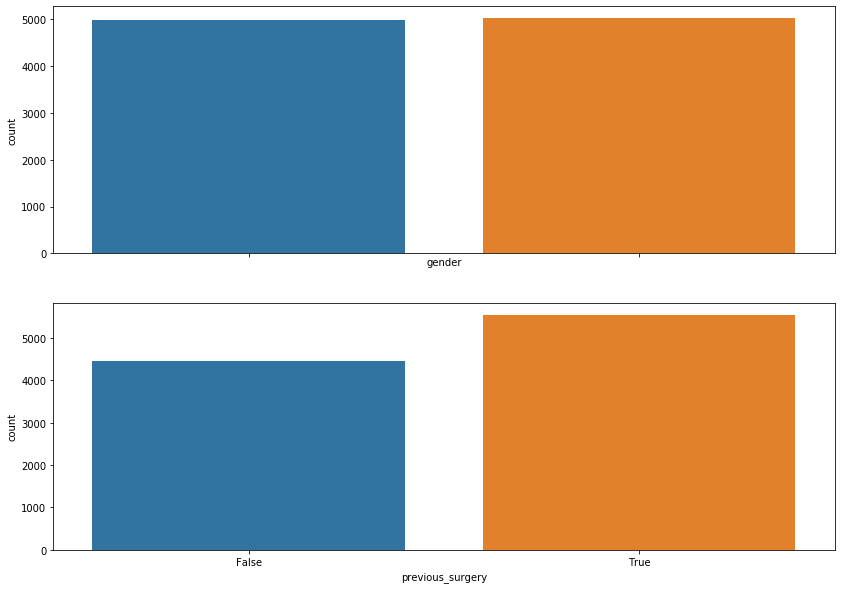

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize =(14,10) )
sns.countplot(x='gender', data=data, ax=ax1)
sns.countplot(x='previous_surgery', data=data, ax=ax2)
plt.show()

Now performing EDA on numerical variables `['blood loss (ml)', 'weight (kg)', 'operation_time_minutes']`

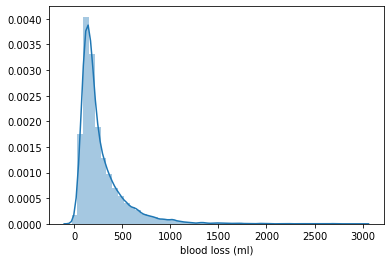

In [22]:
sns.distplot(data['blood loss (ml)'])

Clearly from the figures and stats it could be seen that for ASA value of 3,4,5 there is more blood loss compared to others.
If antibiotics is given then there is more blood loss as the mean value is 285 ml compare to 273ml of blood loss when no antibiotics are given. So `['ASA and antibiotic_time]` are very useful during prediction of blood loss.

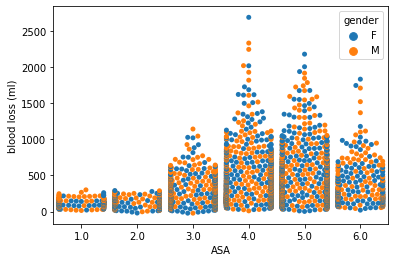

In [23]:
#sns.swarmplot(x='ASA',y='blood loss (ml)',data=data,hue='gender')

In [24]:
data[data.antibiotic_time.isna() == False]['blood loss (ml)'].describe()

count    2012.000000
mean      285.242545
std       257.711245
min       -15.000000
25%       132.000000
50%       201.000000
75%       349.000000
max      2384.000000
Name: blood loss (ml), dtype: float64

In [25]:
data[data.antibiotic_time.isna() == True]['blood loss (ml)'].describe()

count    7988.000000
mean      273.155608
std       238.596960
min       -25.000000
25%       129.000000
50%       194.000000
75%       334.000000
max      2983.000000
Name: blood loss (ml), dtype: float64

There are some outliers in `weight` feature which might needs to be taken care of as they will effect the mean values.

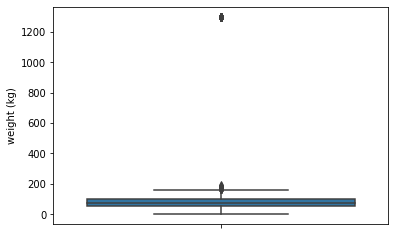

In [26]:
sns.boxplot(y="weight (kg)",data=data)

Converting the 'operation_time' to minutes

In [27]:
#data['operation_time'] = data['operation_time'].apply(convert_to_minutes)
data['operation_time_minutes'] = data['operation_time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

No strong relation or information could be observed between the `operation time` and the `blood loss`. The distribution of blood loss during operation are relatively similar no matter what the operation time is. But there are few points which are very less in number where the longer the operation time is more the blood loss.

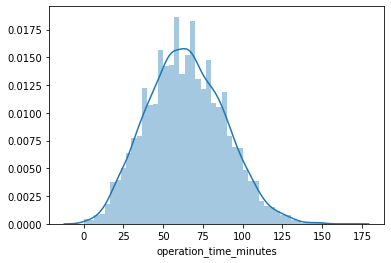

In [28]:
sns.distplot(data['operation_time_minutes'])

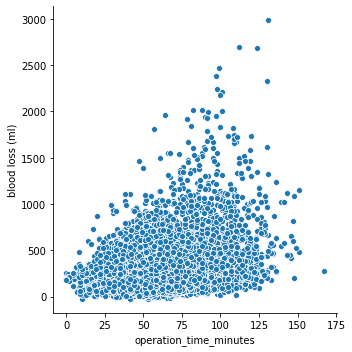

In [29]:
sns.relplot(x='operation_time_minutes',y='blood loss (ml)',data=data)

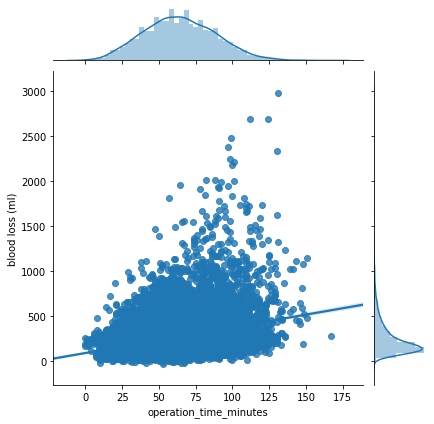

In [30]:
sns.jointplot(x='operation_time_minutes', y='blood loss (ml)',data=data,kind='reg')

From the heatmap it could be seen that `[previous surgery, ASA, Operation time]` are the most correlated features with the blood loss.

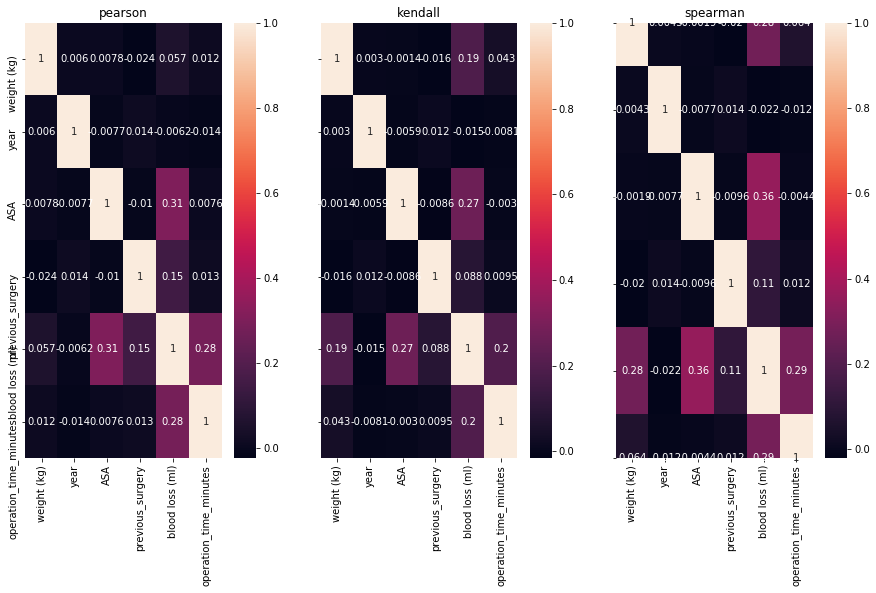

In [31]:
corr_type = ['pearson', 'kendall', 'spearman']
fig, ax = plt.subplots(ncols=3, sharey=True, figsize =(15,8) )
i=0
for corr in corr_type:
    df_corr = data.corr(method=corr)
    sns.heatmap(df_corr, annot=True,ax=ax[i])
    ax[i].set_title(corr)
    i+=1

From the below bar graph it could be see that `['weight','allergy','ASA','antibiotic_time','surgery_time']` have missing values and 'allergy' contain the most number of missing values.

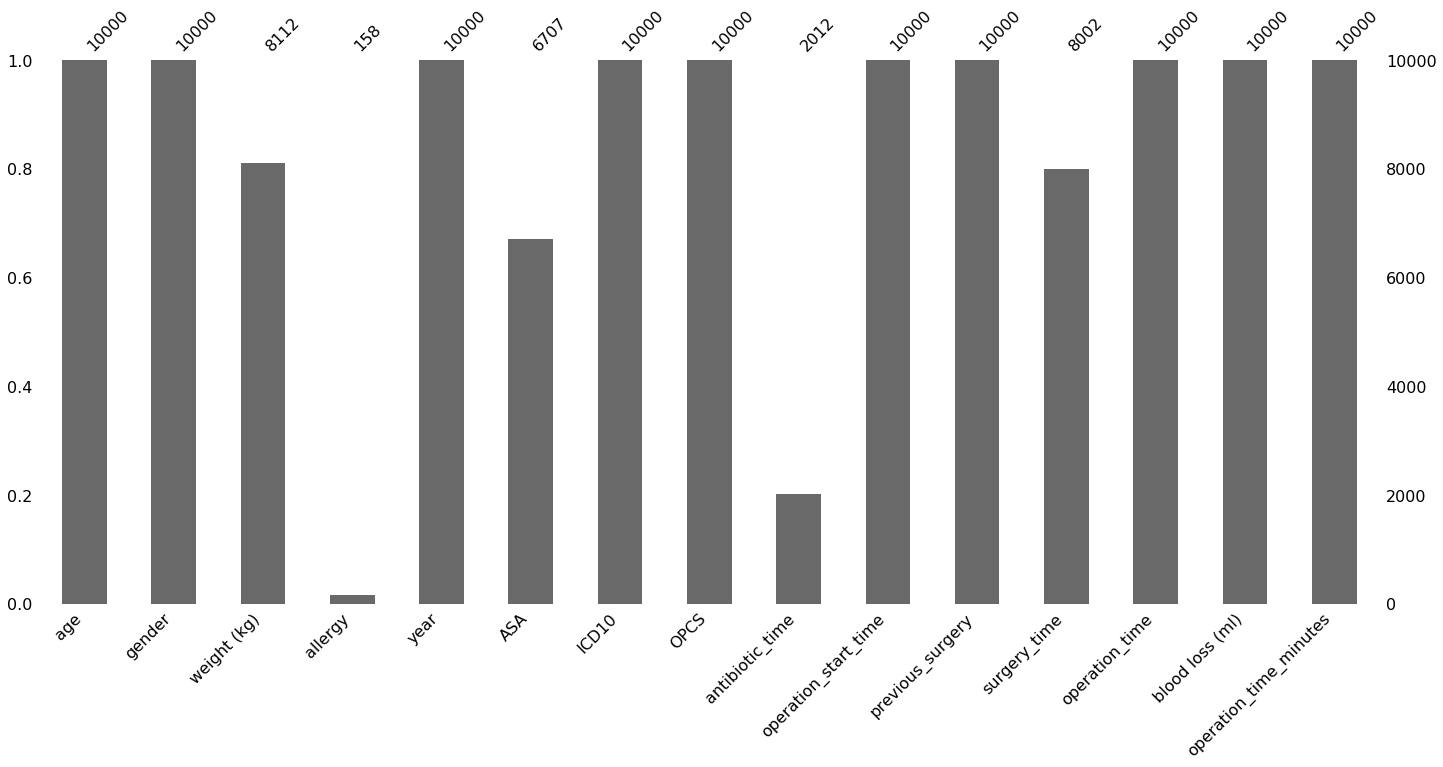

In [32]:
msno.bar(data)

Using this matrix it helps to find the pattern of missingness in the dataset. In features `weight,ASA,surgery_time` has similar pattern for missing values where as allergy shows a different pattern.

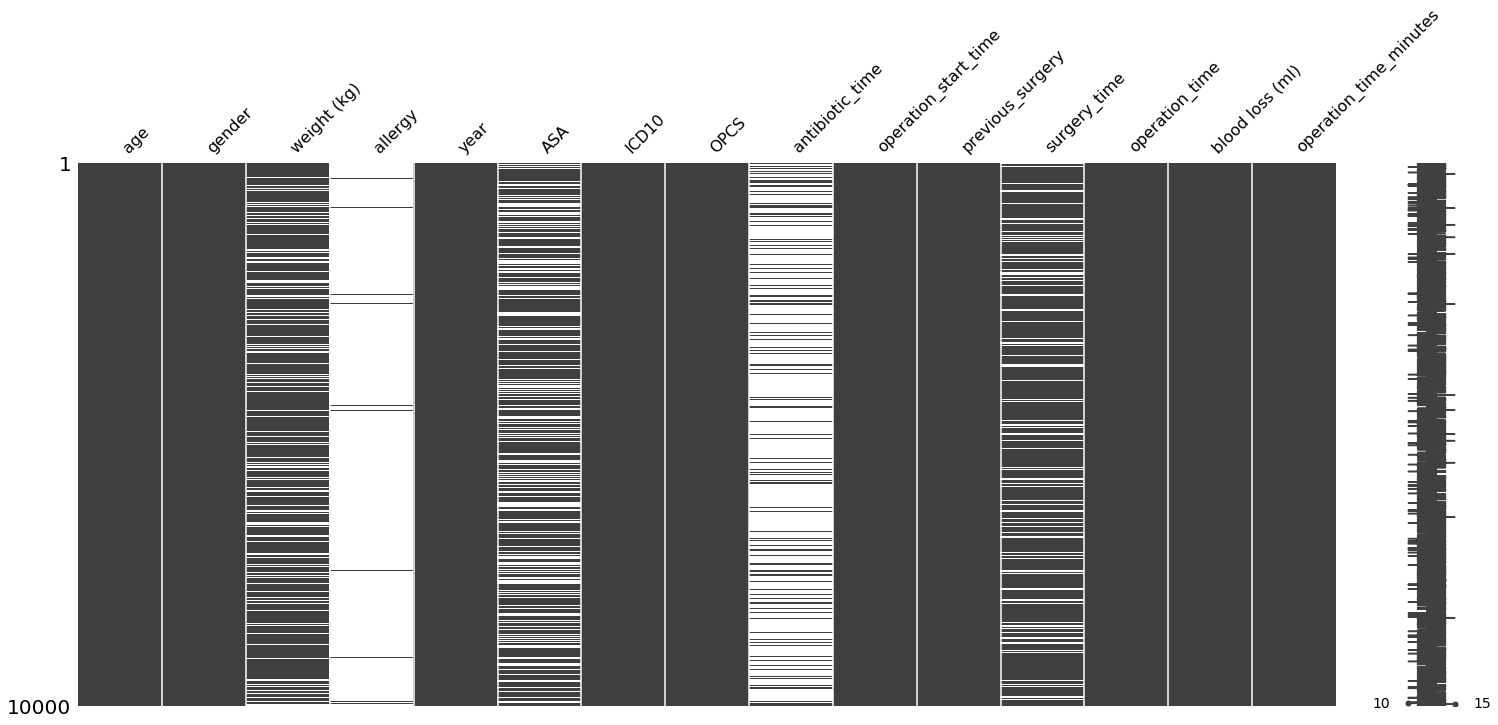

In [33]:
 msno.matrix(data)

Heatmap shows the correlation of missingness between every 2 columns.
A value near -1 means if one variable appears then the other variable is very likely to be missing. A value near 0 means there is no dependence between the occurrence of missing values of two variables. A value near 1 means if one variable appears then the other variable is very likely to be present.

Below it could be seen that there is no dependence between the occurrence of missing values of two variables.


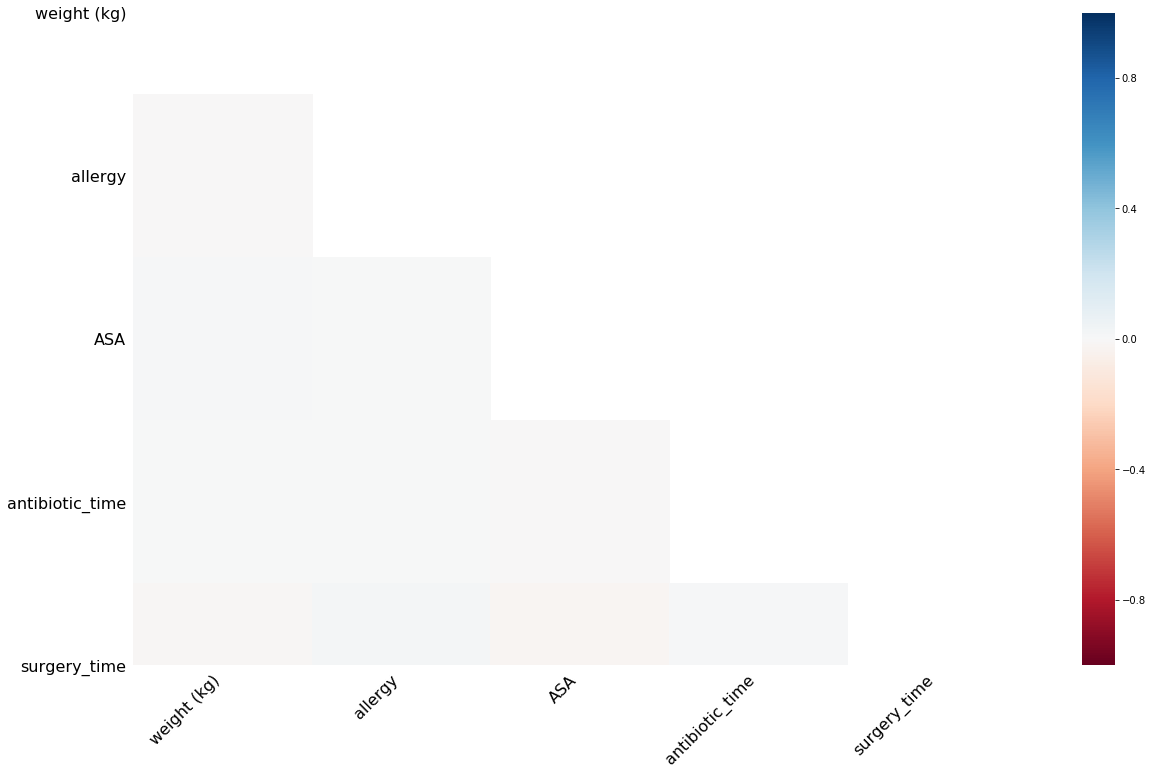

In [34]:
msno.heatmap(data) 

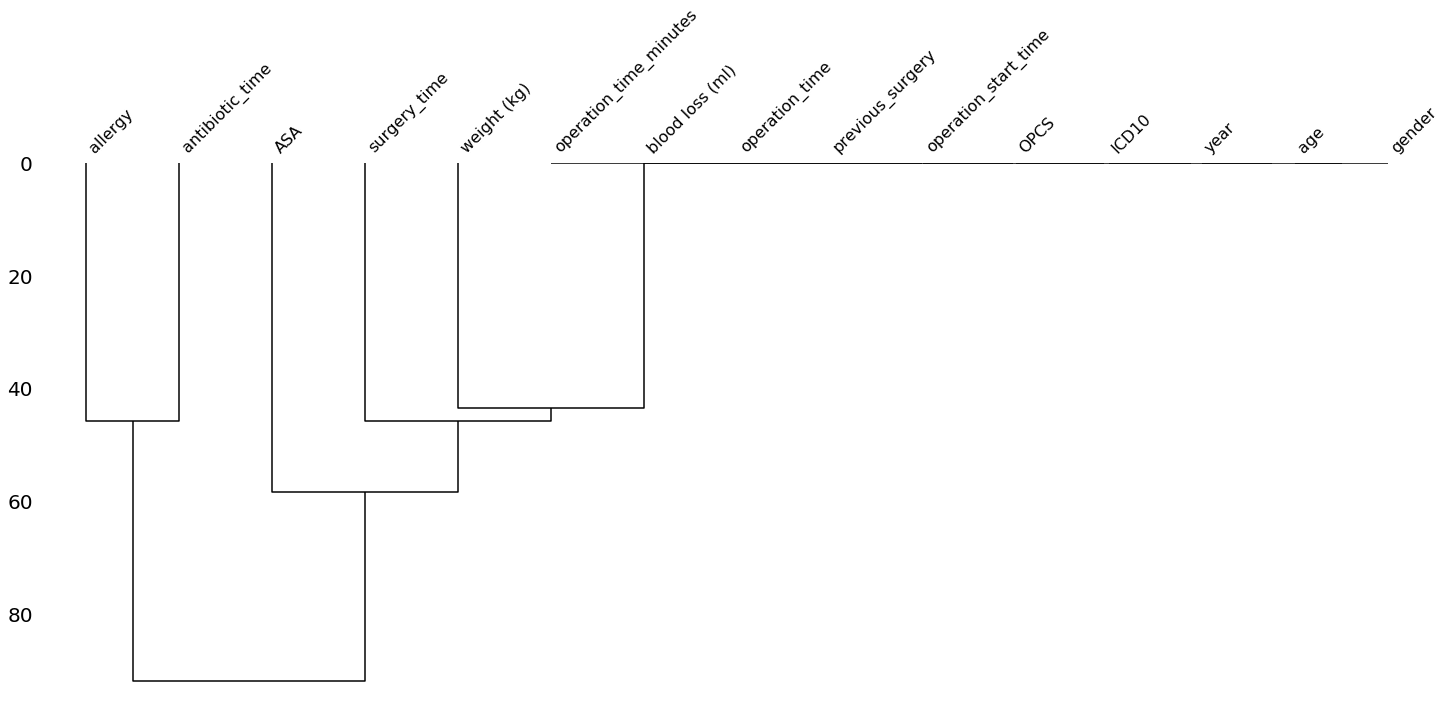

In [35]:
  msno.dendrogram(data)

We could see features `[age,operation_time]` individually aren't helpful in predicting the blood loss where as features `[gender,allergy, ASA, ICD10, OPCS, previous_surgery, antibiotic_time]` are useful in predicting the blood loss. After aggregrating into groups it could be seen that different groups have different blood loss for features allergy, ASA, ICD10 and OPCS.
 
For `ASA` physical status classification of 5.0 there is more blood loss of 1674 ml which means the patient is in a very criticial stage and it further reduces as the criticiality reduces. And for `allergy` the blood loss is more for 'ALLERGY TO ARTEMISIA VULGARIS' followed by 'CYPROTERONE ACETATE AND ETHINYLESTRADIOL'.
Similarly `ICD10, OPCS` there is more blood loss for codes E47 and G30 patients whereas it is least for G49 and B86 codes.

And finally if a patient is given `antibiotic_time`  it could be seen that there is more blood loss than without antibiotic given to a patient.


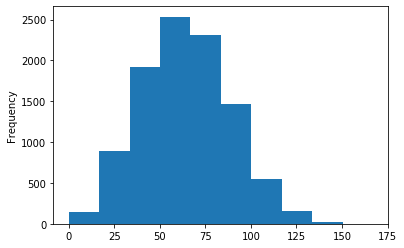

In [48]:
data.operation_time_minutes.plot(kind='hist')

In [178]:
# Bin the operation_time variable into different groups
time_bins = [0,20,50,60,80,100,120,140,170]
data['operation_time_minutes_group'] = pd.cut(data.operation_time_minutes, time_bins)
data['operation_time_minutes_group'].unique()

[(80.0, 100.0], (60.0, 80.0], (20.0, 50.0], (50.0, 60.0], (0.0, 20.0], (100.0, 120.0], (120.0, 140.0], (140.0, 170.0], NaN]
Categories (8, interval[int64]): [(0, 20] < (20, 50] < (50, 60] < (60, 80] < (80, 100] < (100, 120] < (120, 140] < (140, 170]]

In [179]:
def get_blood_loss(feature_col, df):
    """
    Function that returns the avaerage blood loss for entries 

    Parameters
    ----------
    feature_col: str
        The particular feature variable of interest.
    
    df : Dataframe
        The input dataframe containing the dataset.

    Returns
    -------
    prob_per_cat_class_df: Dataframe
        A dataframe with the average blood loss of entries
    """
    prob_per_cat_class_df = pd.DataFrame(columns=[feature_col, 'sample_size', 'Average Blood loss'])
    class_label_list = []
    prob_list = []
    sample_size_list = []
    for class_label in df[feature_col].dropna().unique():
        tot_blood_loss = df[df[feature_col]==class_label]['blood loss (ml)'].sum()
        tot_count = df[df[feature_col]==class_label]['blood loss (ml)'].count()
        sample_size_list.append(tot_count)
        class_label_list.append(class_label)
        prob_list.append(tot_blood_loss/tot_count)
    prob_per_cat_class_df[feature_col] = class_label_list
    prob_per_cat_class_df['Average Blood loss'] = prob_list
    prob_per_cat_class_df['sample_size'] = sample_size_list
    return prob_per_cat_class_df

In [180]:
print("Blood loss after aggregrating operation time: {}\n".format(data.dropna().groupby(['operation_time_minutes_group'])['blood loss (ml)'].mean()))

Blood loss after aggregrating operation time: operation_time_minutes_group
(0, 20]              NaN
(20, 50]      210.666667
(50, 60]      252.666667
(60, 80]      564.400000
(80, 100]     145.000000
(100, 120]    428.000000
(120, 140]           NaN
(140, 170]           NaN
Name: blood loss (ml), dtype: float64



In [186]:
#print(get_blood_loss('operation_time_minutes_group', data))
temp = get_blood_loss('operation_time_minutes_group', data)
temp.sort_values(by = ['Average Blood loss'])

,operation_time_minutes_group,sample_size,Average Blood loss
4,"(0, 20]",268,197.037313
2,"(20, 50]",2686,222.697692
3,"(50, 60]",1575,234.289524
1,"(60, 80]",2905,257.494320
0,"(80, 100]",1837,347.387044
5,"(100, 120]",597,460.018425
6,"(120, 140]",114,567.105263
7,"(140, 170]",15,654.866667


It could be seen that there is realtionship between operation time and blood loss. More the operation time more is blood loss.

In [ ]:
#data_new = data.dropna().groupby(['age'])['operation_time_minutes_group']
data_new = data.dropna().groupby(['age'])['operation_time_minutes']
header_bool=True
for temp in data_new:
     if(header_bool):
         print("Age   operation_time_minutes ")
     header_bool = False
     print("{}     {}".format(temp[0],temp[1].mean()))
        


In [ ]:
data.groupby('age')['operation_time_minutes'].describe()

In [124]:
data['operation_time_minutes'].describe()

count    10000.000000
mean        64.236900
std         24.197717
min          0.000000
25%         47.000000
50%         64.000000
75%         81.000000
max        167.000000
Name: operation_time_minutes, dtype: float64

In [127]:
data.dropna().groupby(['age'])['operation_time_minutes'].mean()

age
18-41     26.00
250       44.00
42-53     69.40
54-63     78.50
64-72     60.75
73-95    110.00
Name: operation_time_minutes, dtype: float64

In [188]:
data.dropna()['operation_time_minutes'].mean()

66.21428571428571

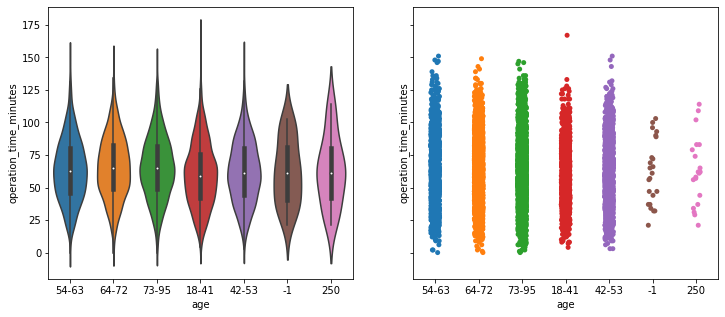

In [189]:
fig, ax =  plt.subplots(ncols=2, sharey=True, figsize =(12,5))
sns.violinplot(x='age', y='operation_time_minutes', data=data, ax=ax[0])
sns.stripplot(x='age', y='operation_time_minutes', data=data, ax=ax[1])

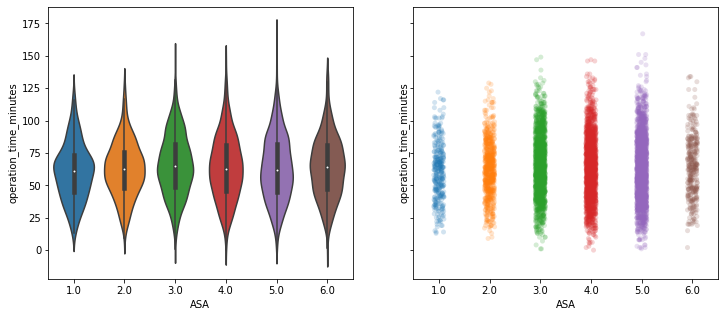

In [182]:
fig, ax =  plt.subplots(ncols=2, sharey=True, figsize =(12,5))
sns.violinplot(x='ASA', y='operation_time_minutes', data=data, ax=ax[0])
sns.stripplot(x='ASA', y='operation_time_minutes', data=data, alpha=0.2, jitter=True, ax=ax[1])

In [128]:
data.dropna().groupby(['allergy'])['operation_time_minutes'].mean()

allergy
ALLERGY TO ARTEMISIA VULGARIS                                         79.000000
ALLERGY TO FOOD ADDITIVE                                              26.000000
CYPROTERONE ACETATE AND ETHINYLESTRADIOL                             105.000000
FLUOCORTOLONE                                                         48.000000
INTERFERON-A-2A                                                       68.000000
NON-IMMUNOGLOBULIN E-MEDIATED DRUG SENSITIVITY,  CYCLOPENTHIAZIDE     66.000000
PENICILLIN                                                            83.333333
PLEASE SEE PAGE 05 OF THE PREASSESMENT BOOKLET                        52.000000
PSEUDO TO ASPARTAME                                                   75.000000
TRIPHENYLMETHANE AZO DISINFECTANT DYE                                 63.000000
VERAPAMIL                                                             51.000000
XYLOMETAZOLINE                                                        44.000000
Name: operation_time_minutes, dt

In [161]:
print("Operation time aggregrating ASA physical status classification system: {}\n".format(data.dropna().groupby(['ASA'])['operation_time_minutes'].mean()))
print("Operation time after aggregrating ICD codes: {}\n".format(data.dropna().groupby(['ICD10'])['operation_time_minutes'].mean()))
print("Operation time after aggregrating Classification of Interventions and Procedures: {}".format(data.dropna().groupby(['OPCS'])['operation_time_minutes'].mean()))

Operation time aggregrating ASA physical status classification system: ASA
1.0    88.00
2.0    39.00
3.0    64.25
4.0    72.40
5.0    79.00
6.0    63.00
Name: operation_time_minutes, dtype: float64

Operation time after aggregrating ICD codes: ICD10
A16    105
A19     52
B11     51
B33     48
B71    110
B81     63
D01     44
D82     52
E47     79
F45     26
G02     67
G49     88
G58     75
Name: operation_time_minutes, dtype: int64

Operation time after aggregrating Classification of Interventions and Procedures: OPCS
B21     88
B86     26
C38     68
C62     66
C89     52
D23    110
G30     79
G97     48
H65     52
J12    105
J28     63
K48     51
K84     44
K89     75
Name: operation_time_minutes, dtype: int64


In [177]:
#temp = data.dropna().groupby(['ASA'])['operation_time_minutes']
#for name, group in temp:
#    print(name)
#    print(group.mean())

From the above plots it could be seen that `allergy,  blood loss, ICD, OPCS`  have high correlation with the `operation time`. There is higher probability that more severe is the disease or patient condition more time would be taken to perform the surgery. There features would be very helpful during prediction.
 


# References

https://www.ncbi.nlm.nih.gov/books/NBK442032/

https://www.bsac.org.uk/antimicrobialstewardshipebook/Chapter%2020/Surgical%20Prophylaxis.pdf

https://www.nhs.uk/conditions/having-surgery/

https://www.webmd.com/healthy-aging/what-expect-surgery#1

https://www.who.int/classifications/classification-of-diseases

https://en.wikipedia.org/wiki/OPCS-4

https://en.wikipedia.org/wiki/ASA_physical_status_classification_system

https://datasciencechalktalk.com/2019/09/02/handling-missing-values-with-missingo/

 
